 
<b><span style="color:white; font-size:26px;">Apple Watch and Fitbit data</span></b>

<b><span style="color:white; font-size:18px;">A sample of 46 participants using an apple watch and a fitbit for 65 minutes.</span></b>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df_all = pd.read_csv('/Users/urszulabadysiak/jdszr16-pajtoners/Ula/data_aw_fb.csv')

In [28]:
df = df_all[df_all['device'] == 'apple watch']

In [32]:
df.head()

,Unnamed: 0,X1,age,gender,height,weight,steps,hear_rate,calories,distance,entropy_heart,entropy_setps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,device,activity
0,1,1,20,1,168.0,65.4,10.771429,78.531302,0.344533,0.008327,6.221612,6.116349,59.0,1.000000,19.531302,0.138520,1.000000,0.089692,apple watch,Lying
1,2,2,20,1,168.0,65.4,11.475325,78.453390,3.287625,0.008896,6.221612,6.116349,59.0,1.000000,19.453390,0.137967,1.000000,0.102088,apple watch,Lying
2,3,3,20,1,168.0,65.4,12.179221,78.540825,9.484000,0.009466,6.221612,6.116349,59.0,1.000000,19.540825,0.138587,1.000000,0.115287,apple watch,Lying
3,4,4,20,1,168.0,65.4,12.883117,78.628260,10.154556,0.010035,6.221612,6.116349,59.0,1.000000,19.628260,0.139208,1.000000,0.129286,apple watch,Lying
4,5,5,20,1,168.0,65.4,13.587013,78.715695,10.825111,0.010605,6.221612,6.116349,59.0,0.982816,19.715695,0.139828,0.241567,0.144088,apple watch,Lying


In [31]:
# check overal size of the table
df.shape

(3656, 20)

In [33]:
# see summary data
df.describe().round(2)

,Unnamed: 0,X1,age,gender,height,weight,steps,hear_rate,calories,distance,entropy_heart,entropy_setps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance
count,3656.00,3656.00,3656.00,3656.00,3656.00,3656.00,3656.00,3656.00,3656.00,3656.00,3656.00,3656.00,3656.00,3656.00,3656.00,3656.00,3656.00,3656.00
mean,1828.50,1834.92,29.41,0.47,169.88,70.61,180.25,91.25,5.78,0.08,6.12,6.05,68.37,0.01,22.88,0.19,8.85,39.66
std,1055.54,1061.46,9.04,0.50,10.43,14.12,269.44,26.75,7.28,0.14,0.22,0.18,11.93,0.74,23.97,0.21,10.08,112.41
min,1.00,1.00,18.00,0.00,143.00,43.00,1.00,33.00,0.06,0.00,5.12,5.66,34.15,-1.00,-31.53,-0.27,0.00,0.00
25%,914.75,914.75,23.00,0.00,160.00,60.50,10.77,75.46,0.46,0.01,6.08,5.91,60.00,-0.74,5.80,0.05,1.68,0.09
50%,1828.50,1832.50,28.00,0.00,168.00,70.00,60.13,83.62,0.76,0.03,6.18,6.08,69.60,0.01,15.44,0.13,5.20,2.06
75%,2742.25,2756.25,33.00,1.00,180.00,79.30,203.27,102.52,13.81,0.08,6.23,6.19,78.46,0.78,30.72,0.26,12.12,15.24
max,3656.00,3670.00,56.00,1.00,191.00,115.00,1714.00,194.33,29.24,1.09,6.41,6.41,97.00,1.00,128.50,1.30,56.14,1721.42


In [34]:
# list column names
df.columns

Index(['Unnamed: 0', 'X1', 'age', 'gender', 'height', 'weight', 'steps',
       'hear_rate', 'calories', 'distance', 'entropy_heart', 'entropy_setps',
       'resting_heart', 'corr_heart_steps', 'norm_heart', 'intensity_karvonen',
       'sd_norm_heart', 'steps_times_distance', 'device', 'activity'],
      dtype='object')

In [35]:
# check if there are any missing data in the columns
df.isnull().sum()

Unnamed: 0              0
X1                      0
age                     0
gender                  0
height                  0
weight                  0
steps                   0
hear_rate               0
calories                0
distance                0
entropy_heart           0
entropy_setps           0
resting_heart           0
corr_heart_steps        0
norm_heart              0
intensity_karvonen      0
sd_norm_heart           0
steps_times_distance    0
device                  0
activity                0
dtype: int64

In [36]:
# find duplicate rows
duplicate_rows = df.duplicated()

# print duplicate rows
print(duplicate_rows)

0       False
1       False
2       False
3       False
4       False
        ...  
3651    False
3652    False
3653    False
3654    False
3655    False
Length: 3656, dtype: bool


In [37]:
df_num = df.drop(['device','Unnamed: 0','X1', 'age', 'gender','entropy_heart', 'entropy_setps',
        'corr_heart_steps', 'norm_heart', 'intensity_karvonen',
       'sd_norm_heart', 'steps_times_distance','hear_rate', 'activity'], axis=1)

In [38]:
df_num.describe().round(2)

,height,weight,steps,calories,distance,resting_heart
count,3656.00,3656.00,3656.00,3656.00,3656.00,3656.00
mean,169.88,70.61,180.25,5.78,0.08,68.37
std,10.43,14.12,269.44,7.28,0.14,11.93
min,143.00,43.00,1.00,0.06,0.00,34.15
25%,160.00,60.50,10.77,0.46,0.01,60.00
50%,168.00,70.00,60.13,0.76,0.03,69.60
75%,180.00,79.30,203.27,13.81,0.08,78.46
max,191.00,115.00,1714.00,29.24,1.09,97.00


In [39]:
df_num.corr()

,height,weight,steps,calories,distance,resting_heart
height,1.000000,0.709161,0.032904,0.222973,0.039255,-0.433654
weight,0.709161,1.000000,0.016699,0.159503,0.140381,-0.221414
steps,0.032904,0.016699,1.000000,-0.158519,0.663788,0.112008
calories,0.222973,0.159503,-0.158519,1.000000,-0.004263,-0.190581
distance,0.039255,0.140381,0.663788,-0.004263,1.000000,0.038327
resting_heart,-0.433654,-0.221414,0.112008,-0.190581,0.038327,1.000000


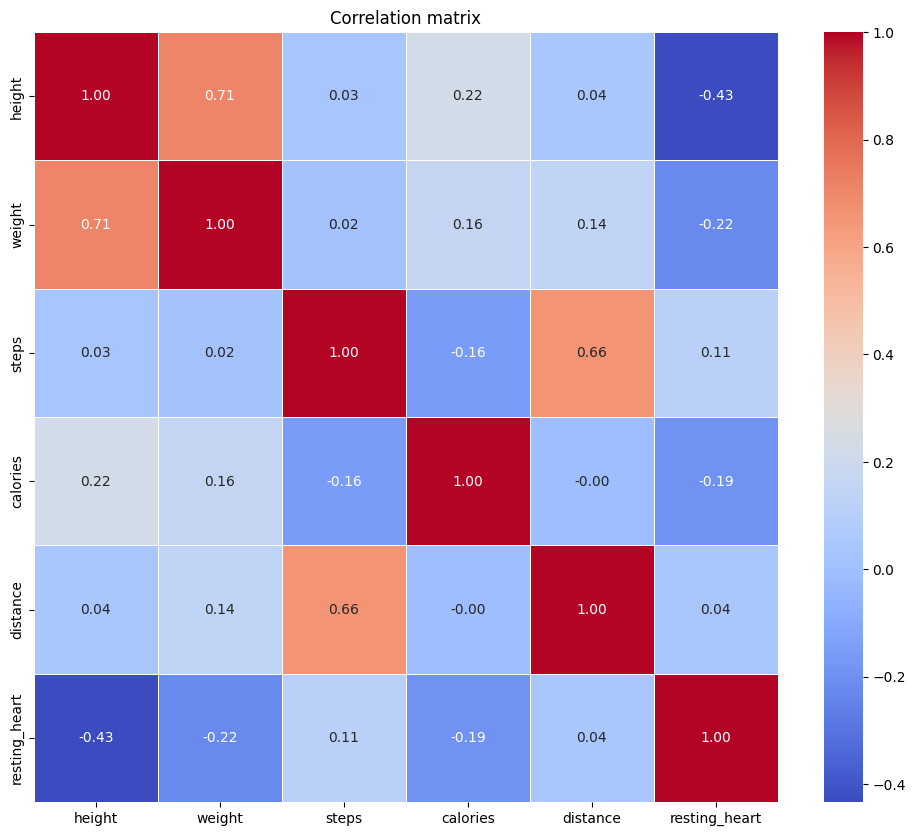

In [40]:
# Calculate correlation matrix
correlation_matrix = df_num.corr()

plt.figure(figsize=(12, 10))  
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation matrix")
plt.show()

<Axes: ylabel='count'>

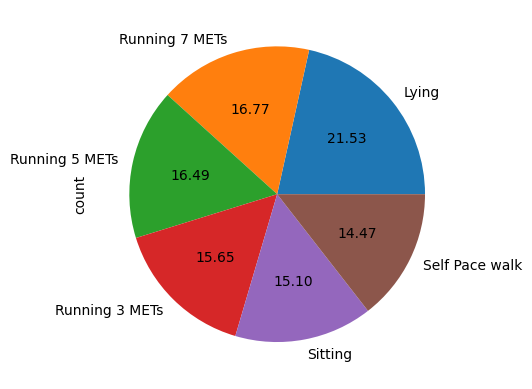

In [41]:
df['activity'].value_counts().plot(kind='pie',autopct='%.2f')

<Axes: xlabel='device'>

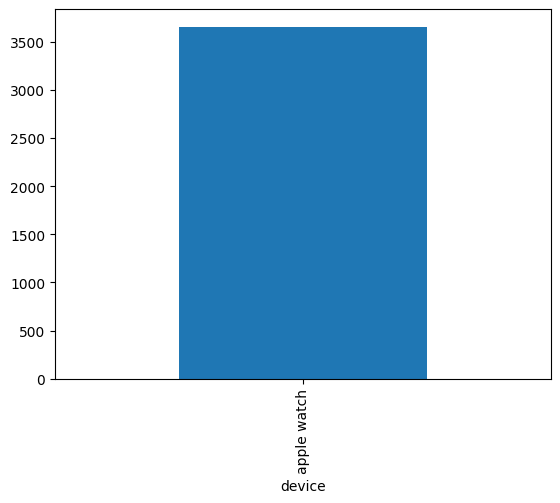

In [43]:
#not used anymore as we will have apple watch only
df['device'].value_counts().plot(kind='bar')

<Axes: xlabel='activity'>

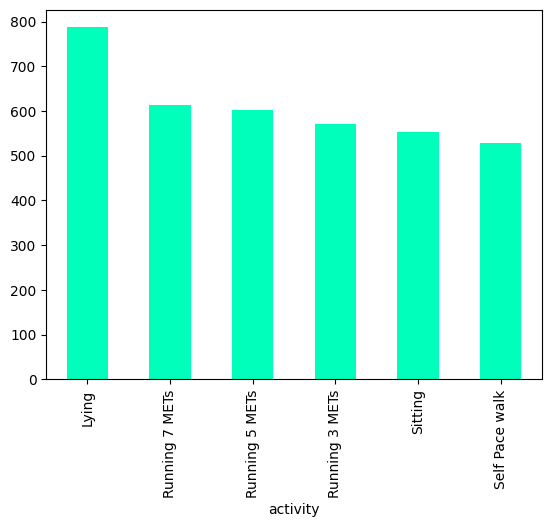

In [44]:
df['activity'].value_counts().plot(kind='bar', color= '#00FFBB')

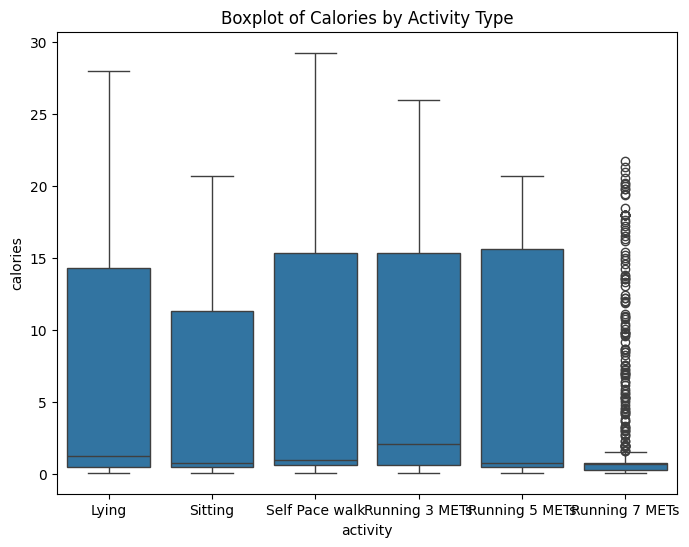

In [46]:
# Boxplot of calories
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='activity', y='calories')  
plt.title("Boxplot of Calories by Activity Type")
plt.show()

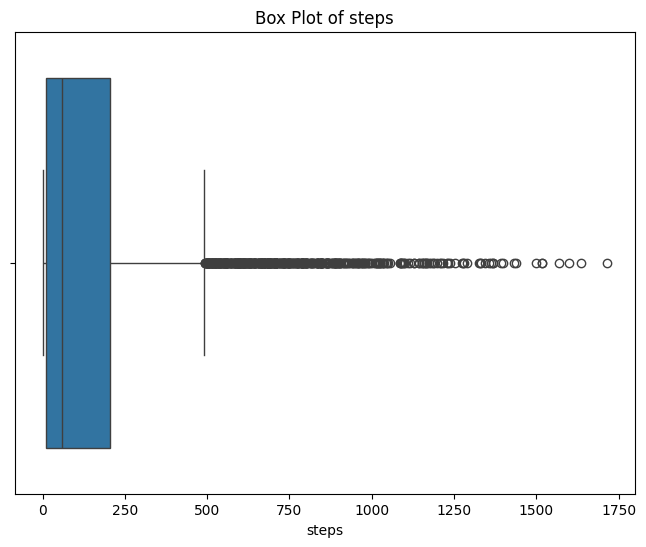

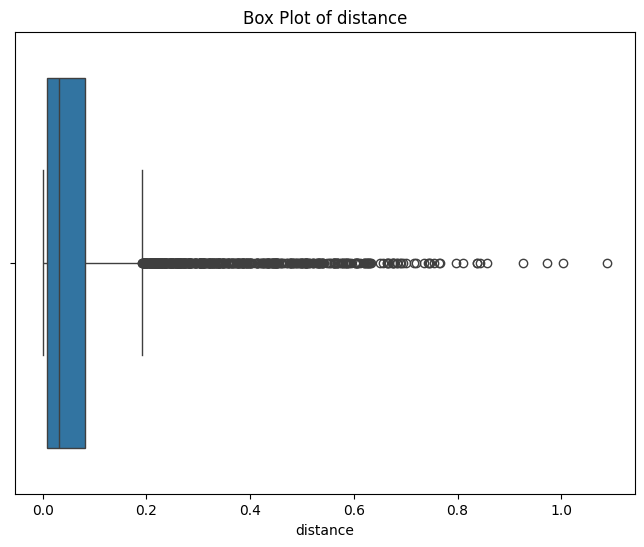

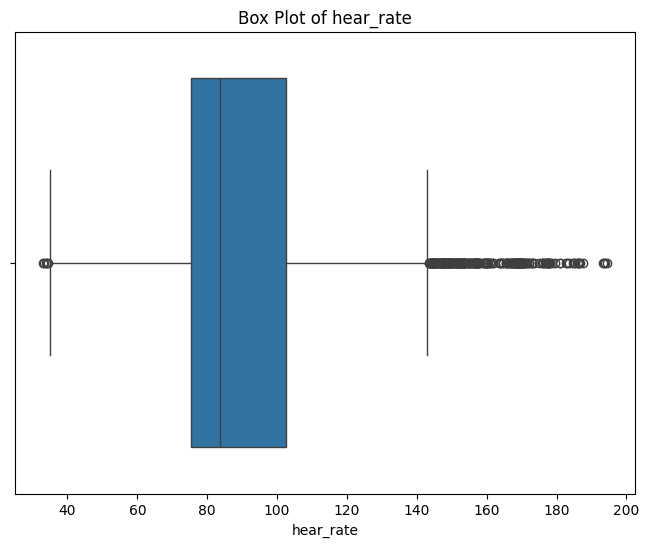

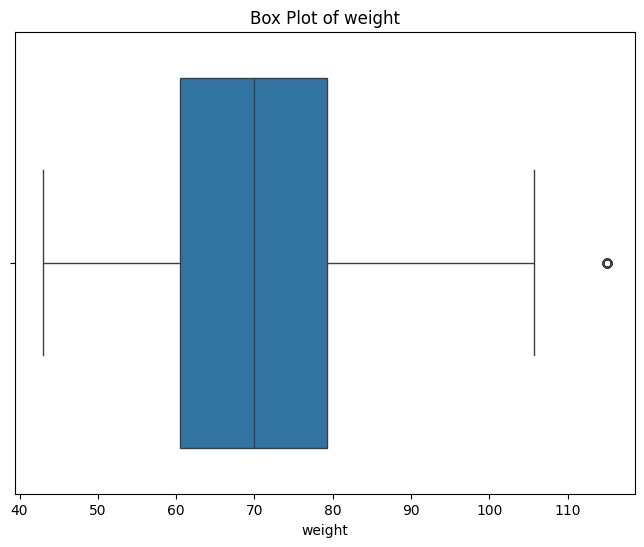

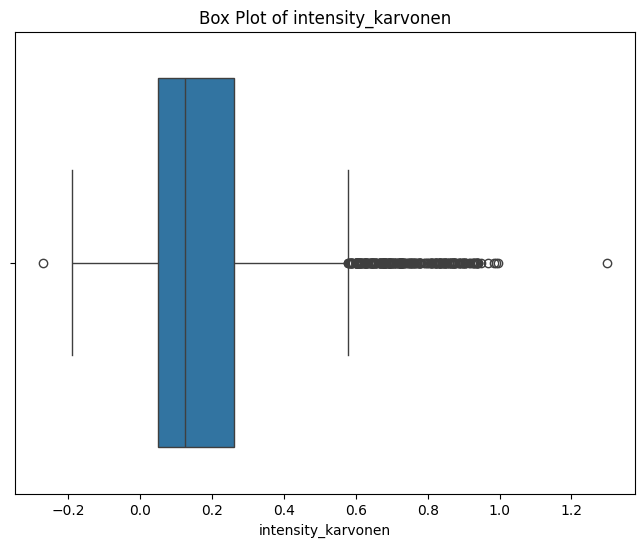

In [59]:
for column in ['steps', 'distance', 'hear_rate', 'weight', 'intensity_karvonen']:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[column])
    plt.title(f"Box Plot of {column}")
    plt.show()

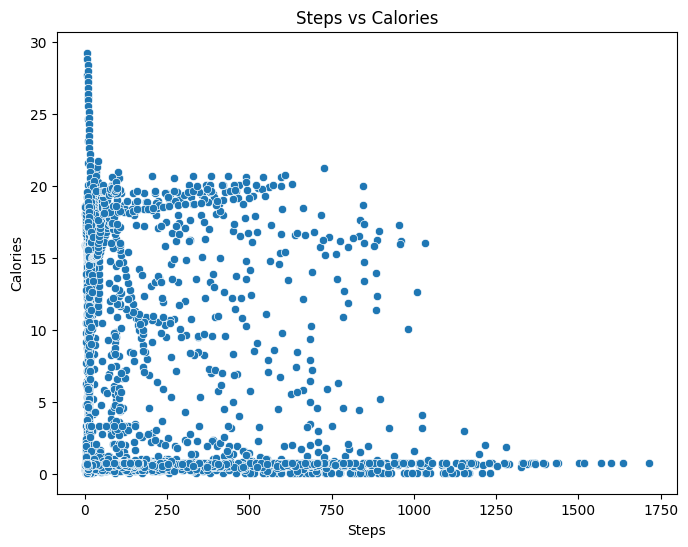

In [60]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['steps'], y=df['calories'])
plt.title("Steps vs Calories")
plt.xlabel("Steps")
plt.ylabel("Calories")
plt.show()


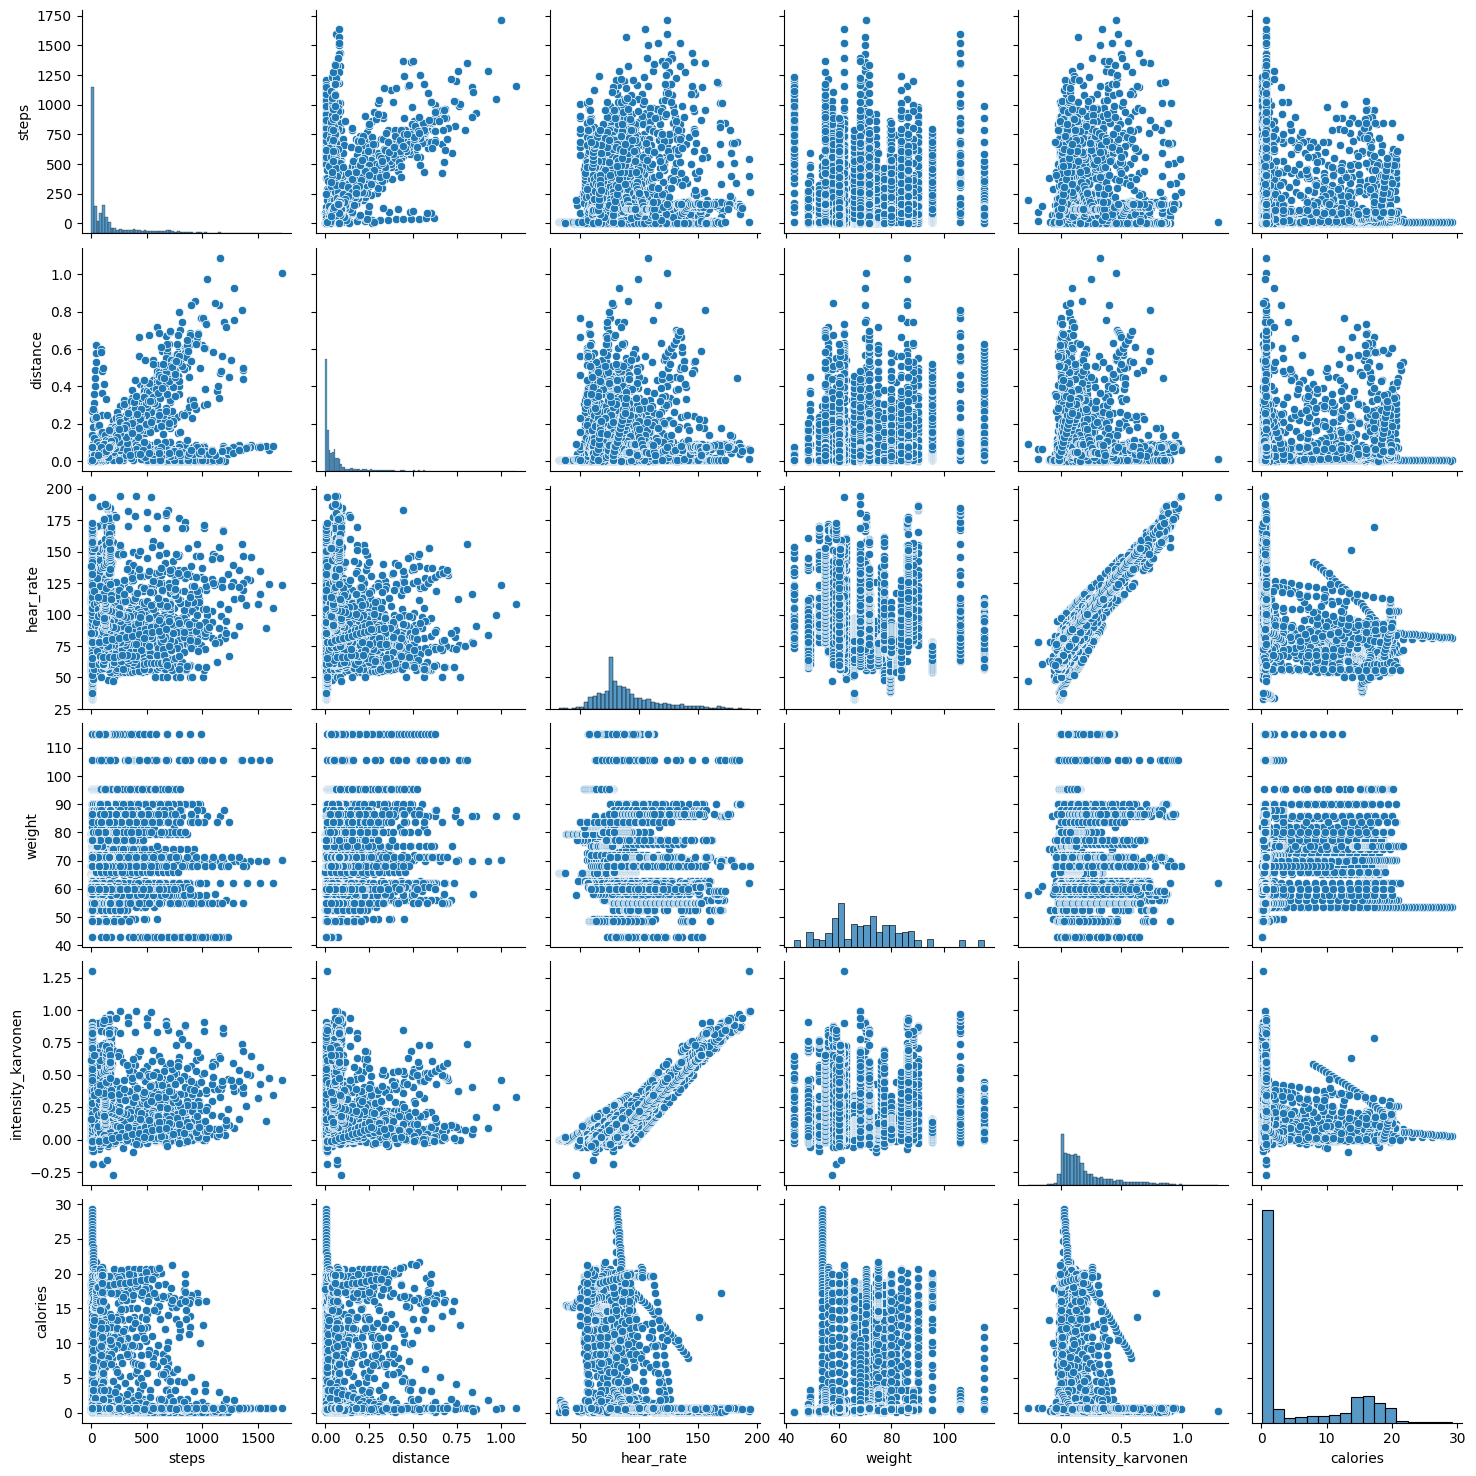

In [61]:
sns.pairplot(df[['steps', 'distance', 'hear_rate', 'weight', 'intensity_karvonen', 'calories']])
plt.show()


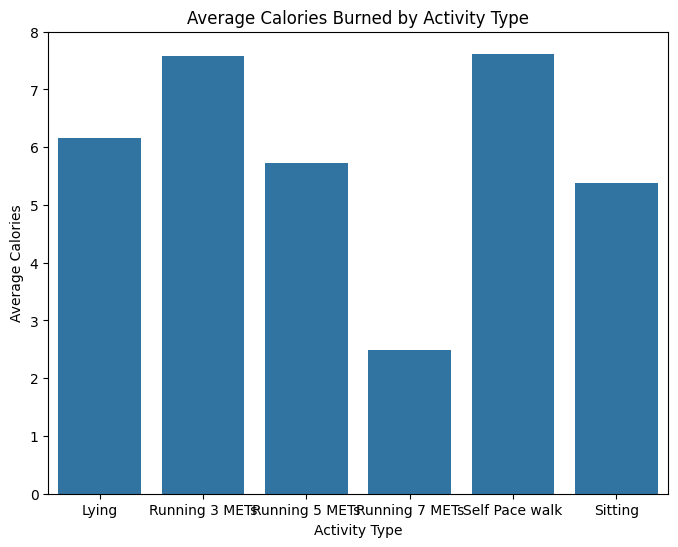

In [62]:
if 'activity' in df.columns: 
    grouped_data = df.groupby('activity')['calories'].mean().reset_index()
    plt.figure(figsize=(8, 6))
    sns.barplot(x='activity', y='calories', data=grouped_data)
    plt.title("Average Calories Burned by Activity Type")
    plt.xlabel("Activity Type")
    plt.ylabel("Average Calories")
    plt.show()


In [49]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Encode categorical variables if any
apple_watch_data_encoded = pd.get_dummies(df, drop_first=True)

# Define features and target
features = ['steps', 'distance', 'hear_rate', 'weight', 'intensity_karvonen'] 
target = 'calories'  

X = apple_watch_data_encoded[features]
y = apple_watch_data_encoded[target]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [50]:
from sklearn.ensemble import RandomForestRegressor

# Training the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [51]:
# Predict on the test set
y_pred = model.predict(X_test)


In [52]:
#MAE

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")


Mean Absolute Error (MAE): 1.638249781638164


In [53]:
#MSE

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")


Mean Squared Error (MSE): 9.2693668877506


In [54]:
#RMSE
rmse = mse ** 0.5
print(f"Root Mean Squared Error (RMSE): {rmse}")


Root Mean Squared Error (RMSE): 3.0445634970797704


In [56]:
#R2
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2}")


R² Score: 0.8188396977319973


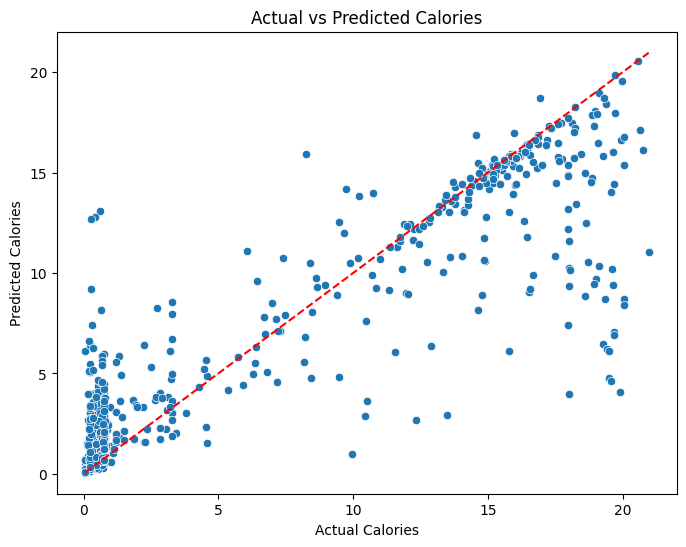

In [57]:
# Scatter plot of actual vs predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Ideal line
plt.xlabel("Actual Calories")
plt.ylabel("Predicted Calories")
plt.title("Actual vs Predicted Calories")
plt.show()


In [58]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='r2')  # 5-fold cross-validation
print(f"Cross-Validation R² Scores: {cv_scores}")
print(f"Mean CV R² Score: {cv_scores.mean()}")


Cross-Validation R² Scores: [-0.85388587 -0.32022873 -0.2883741  -0.65191581 -1.85234894]
Mean CV R² Score: -0.7933506888987928


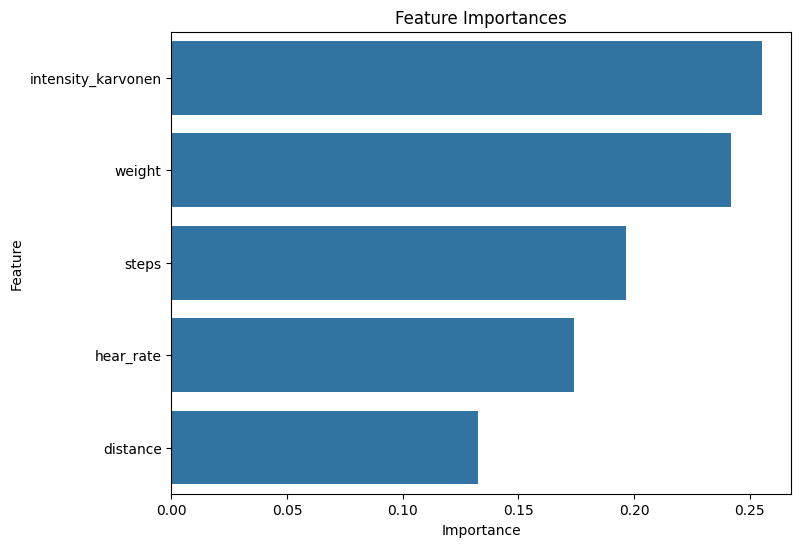

In [63]:
# feature importance
feature_importances = pd.DataFrame({
    'Feature': features,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()